# Week 8 Homework - Wright-Fisher
___________________________________

# Load packages

In [1]:
from numpy.random import binomial as binom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=1.4)

# 1) Define helper functions

In [2]:
def wright_fisher(allele_freq, pop_size=100, selection=0):
    freqs = [allele_freq]
    num_genomes = 2*pop_size
    while (allele_freq > 0) & (allele_freq < 1):
        if selection < 0:
            b_selection = -selection
            b_i = (1 - allele_freq) * num_genomes
            allele_freq = 1 - (b_i*(1+b_selection) / (num_genomes - b_i + b_i*(1+b_selection)))
        elif selection > 0:
            i = allele_freq * num_genomes
            allele_freq = i*(1+selection) / (num_genomes - i + i*(1+selection))
        
        number_next_gen = binom(num_genomes, allele_freq)
        allele_freq = number_next_gen / num_genomes
        freqs.append(allele_freq)
    
    #print(freqs)
    return freqs

def plot_generations(freq_list, figtext=""):
    if figtext != "":
        figtext = '\n' + figtext
    
    gen = list(range(len(freq_list)))
    fig, ax = plt.subplots(figsize=(8,8))
    
    sns.lineplot(x=gen, y=freq_list, color='r', ax=ax)
    ax.set_xlim([0, len(freq_list)])
    ax.set_ylim(0, 1)
    ax.set_yticks([i/10 for i in range(11)])
    ax.set_title('Wright Fisher Simulation With Population Size of 100' + figtext)
    ax.set_xlabel('Generation number')
    ax.set_ylabel('Frequency of Allele')
    
    plt.show()

def sim(allele_freq, pop_size, num_sims=1000, selection=0):
    gens = []
    for i in range(num_sims):
        gens.append(len(wright_fisher(allele_freq, pop_size, selection)) - 1)
    return gens

# 2) Plot one population over time

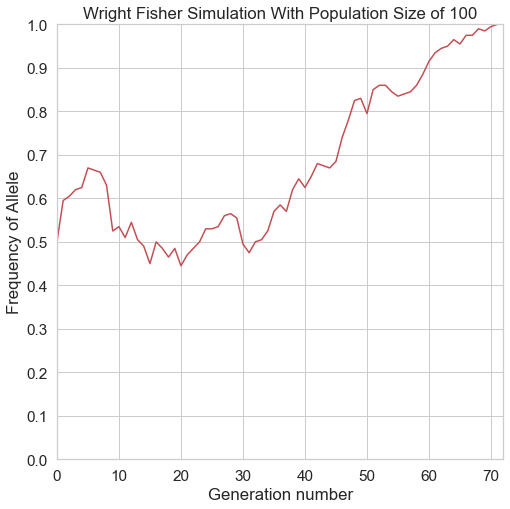

In [3]:
plot_generations(wright_fisher(0.5))

# 3) Distribution of generations to fixation for a popualtion of 100

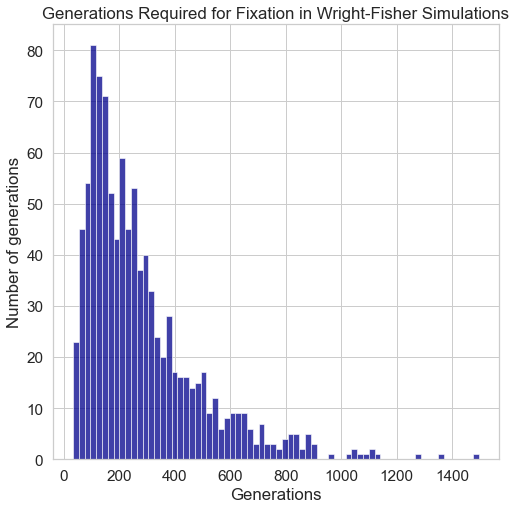

In [4]:
gens = sim(0.5, 100) 
        
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(gens, bins=70, color='darkblue', ax=ax)
ax.set_title('Generations Required for Fixation in Wright-Fisher Simulations')
ax.set_xlabel('Generations')
ax.set_ylabel('Number of generations')
plt.show()

# 4) Changing populations

In [5]:
pop_sizes = [10**i for i in range(2, 8)]
median_gens_dpop = []
for n in pop_sizes:
    med_generation = np.median(sim(0.5, n, 5))
    median_gens_dpop.append(med_generation)
    print(n) # To track progress. This cell takes a while to run

logx_dpop = [np.log10(x) for x in pop_sizes]
logy_dpop = [np.log10(y) for y in median_gens_dpop]

100
1000
10000
100000
1000000
10000000


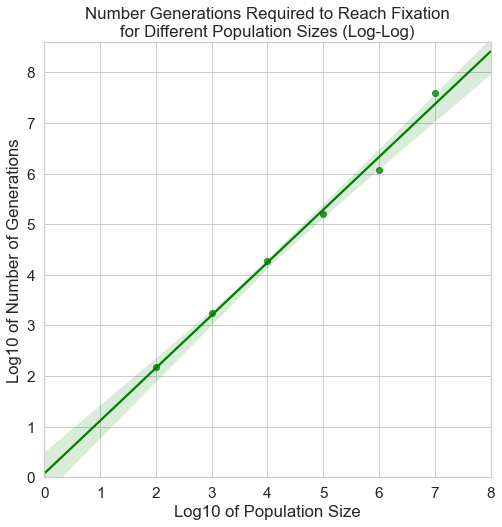

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim([0, max(logx_dpop)+1])
ax.set_ylim([0, max(logy_dpop)+1])
sns.regplot(x=logx_dpop, y=logy_dpop, ax=ax, truncate=False, color='green')
ax.set_title("Number Generations Required to Reach Fixation\nfor Different Population Sizes (Log-Log)")
ax.set_xlabel('Log10 of Population Size')
ax.set_ylabel('Log10 of Number of Generations')

plt.show()

# 5) Changing starting allele frequencies

In [7]:
freqs = [0.05*i for i in range(0, 21)]
median_gens_dallele = []
for p in freqs:
    med_generation = np.median(sim(p, 100, 1000))
    median_gens_dallele.append(med_generation)

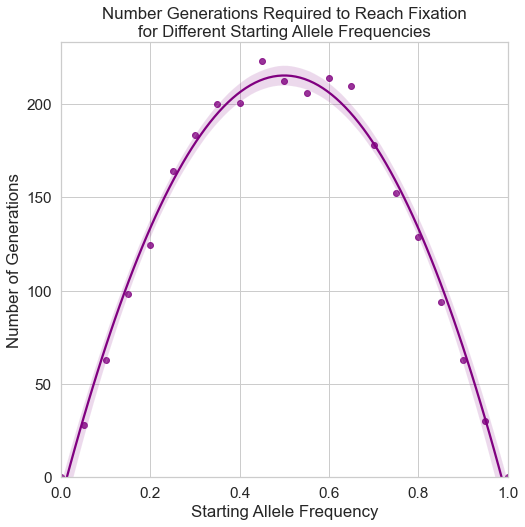

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim([0, 1])
ax.set_ylim([0, max(median_gens_dallele)+10])
sns.regplot(x=freqs, y=median_gens_dallele, order=2, ax=ax, truncate=False, color='purple')
ax.set_title("Number Generations Required to Reach Fixation\nfor Different Starting Allele Frequencies")
ax.set_xlabel('Starting Allele Frequency')
ax.set_ylabel('Number of Generations')

plt.show()

# 6) Changing selection

In [9]:
selecs = [0.01*i for i in range(-100, 101)]
median_gens_dselec = []
for s in selecs:
    med_generation = np.median(sim(0.5, 1000, 100, s))
    median_gens_dselec.append(med_generation)

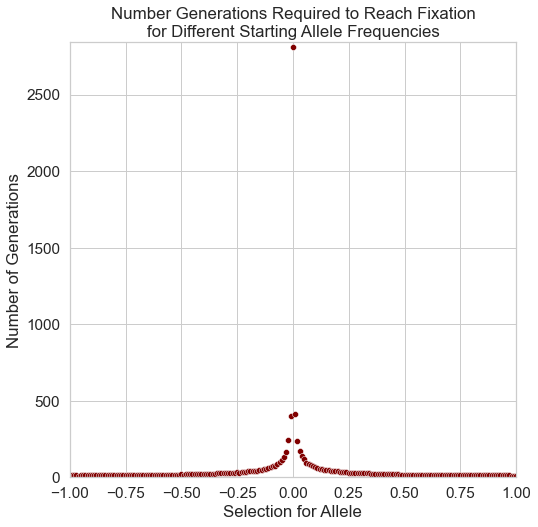

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim([-1, 1])
ax.set_ylim([0, max(median_gens_dselec)+30])
sns.scatterplot(x=selecs, y=median_gens_dselec, ax=ax, color='maroon')
ax.set_title("Number Generations Required to Reach Fixation\nfor Different Starting Allele Frequencies")
ax.set_xlabel('Selection for Allele')
ax.set_ylabel('Number of Generations')

plt.show()

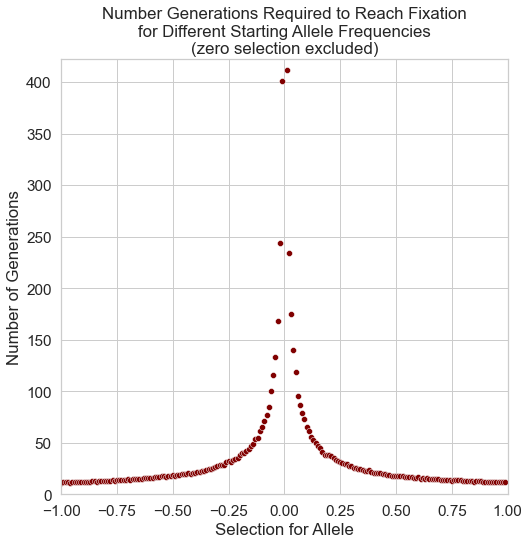

In [11]:

fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim([-1, 1])
ax.set_ylim([0, max(median_gens_dselec[0:100]+median_gens_dselec[101:200])+10])
sns.scatterplot(x=(selecs[0:100]+selecs[101:200]),
                y=(median_gens_dselec[0:100]+median_gens_dselec[101:200]),
                ax=ax, color='maroon')
ax.set_title("Number Generations Required to Reach Fixation"
             "\nfor Different Starting Allele Frequencies"
             "\n(zero selection excluded)")
ax.set_xlabel('Selection for Allele')
ax.set_ylabel('Number of Generations')

plt.show()